<a href="https://colab.research.google.com/github/Anusha2503/Pizza-bot/blob/main/HousePrice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
house_data = pd.read_csv('output.csv')

In [ ]:
house_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
house_data = house_data.copy(deep=True)

In [ ]:
house_data.index

RangeIndex(start=0, stop=4600, step=1)

In [ ]:
house_data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
house_data.size

82800

In [ ]:
house_data.shape

(4600, 18)

In [ ]:
house_data.memory_usage()

Index              128
date             36800
price            36800
bedrooms         36800
bathrooms        36800
sqft_living      36800
sqft_lot         36800
floors           36800
waterfront       36800
view             36800
condition        36800
sqft_above       36800
sqft_basement    36800
yr_built         36800
yr_renovated     36800
street           36800
city             36800
statezip         36800
country          36800
dtype: int64

In [ ]:
house_data.ndim

2

In [ ]:
house_data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [ ]:
house_data.tail(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4590,2014-07-08 00:00:00,380680.555556,4.0,2.50,2620,8331,2.0,0,0,3,2620,0,1991,0,13602 SE 186th Pl,Renton,WA 98058,USA
4591,2014-07-08 00:00:00,396166.666667,3.0,1.75,1880,5752,1.0,0,0,4,940,940,1945,0,3529 SW Webster St,Seattle,WA 98126,USA
4592,2014-07-08 00:00:00,252980.000000,4.0,2.50,2530,8169,2.0,0,0,3,2530,0,1993,0,37654 18th Pl S,Federal Way,WA 98003,USA
4593,2014-07-08 00:00:00,289373.307692,3.0,2.50,2538,4600,2.0,0,0,3,2538,0,2013,1923,5703 Charlotte Ave SE,Auburn,WA 98092,USA
4594,2014-07-09 00:00:00,210614.285714,3.0,2.50,1610,7223,2.0,0,0,3,1610,0,1994,0,26306 127th Ave SE,Kent,WA 98030,USA
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [ ]:
house_data.at[4, 'city']

'Redmond'

In [ ]:
house_data.at[1919, 'floors']

2.0

In [ ]:
house_data.at[1111, 'city']

'Woodinville'

In [ ]:
house_data.iat[5,6]

1.0

In [ ]:
house_data.at[1111, 'bedrooms']

4.0

In [ ]:
house_data.iat[1,11]

280

In [ ]:
house_data.loc[:,'city']

0       Shoreline
1         Seattle
2            Kent
3        Bellevue
4         Redmond
          ...    
4595      Seattle
4596     Bellevue
4597       Renton
4598      Seattle
4599    Covington
Name: city, Length: 4600, dtype: object

In [ ]:
house_data.loc[:,['bedrooms', 'city','country']]

,bedrooms,city,country
0,3.0,Shoreline,USA
1,5.0,Seattle,USA
2,3.0,Kent,USA
3,3.0,Bellevue,USA
4,4.0,Redmond,USA
...,...,...,...
4595,3.0,Seattle,USA
4596,3.0,Bellevue,USA
4597,3.0,Renton,USA
4598,4.0,Seattle,USA


In [ ]:
house_data.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [ ]:
house_data.loc[10,['bedrooms', 'city','country']]

bedrooms                 3.0
city        Lake Forest Park
country                  USA
Name: 10, dtype: object

In [ ]:
house_data.select_dtypes(include=None, exclude=object)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [ ]:
house_data.select_dtypes(include=None, exclude=float)


,date,sqft_living,sqft_lot,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,1340,7912,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,3650,9050,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,1930,11947,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,2000,8030,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,1940,10500,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,1510,6360,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,1460,7573,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,3010,7014,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2090,6630,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
house_data.select_dtypes(include=object, exclude=None)

,date,street,city,statezip,country
0,2014-05-02 00:00:00,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...
4595,2014-07-09 00:00:00,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
import numpy as np

In [ ]:
np.unique(house_data['city'])

array(['Algona', 'Auburn', 'Beaux Arts Village', 'Bellevue',
       'Black Diamond', 'Bothell', 'Burien', 'Carnation', 'Clyde Hill',
       'Covington', 'Des Moines', 'Duvall', 'Enumclaw', 'Fall City',
       'Federal Way', 'Inglewood-Finn Hill', 'Issaquah', 'Kenmore',
       'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley', 'Medina',
       'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park',
       'North Bend', 'Pacific', 'Preston', 'Ravensdale', 'Redmond',
       'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline',
       'Skykomish', 'Snoqualmie', 'Snoqualmie Pass', 'Tukwila', 'Vashon',
       'Woodinville', 'Yarrow Point'], dtype=object)

In [ ]:
np.unique(house_data['condition'])

array([1, 2, 3, 4, 5])

In [ ]:
np.unique(house_data['country'])

array(['USA'], dtype=object)

In [ ]:
np.unique(house_data['street'])

array(['1 View Ln NE', '10 W Etruria St', '100 20th Ave E', ...,
       'Tolt Pipeline Trail', 'Trossachs Blvd SE', 'Valley View Trail'],
      dtype=object)

In [ ]:
np.unique(house_data['bedrooms'])

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
house_data = pd.read_csv('output.csv', index_col=0, na_values=["??", "????"] )

In [ ]:
house_data['bedrooms'] = house_data['bedrooms'].astype('float')

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4600 entries, 2014-05-02 00:00:00 to 2014-07-10 00:00:00
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
dtypes: float64(4), int64(9),

In [ ]:
house_data['city'].nbytes

36800

In [ ]:
house_data['city'].astype('category').nbytes

4952

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4600 entries, 2014-05-02 00:00:00 to 2014-07-10 00:00:00
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
dtypes: float64(4), int64(9),

In [ ]:
print(np.unique(house_data['city']))

['Algona' 'Auburn' 'Beaux Arts Village' 'Bellevue' 'Black Diamond'
 'Bothell' 'Burien' 'Carnation' 'Clyde Hill' 'Covington' 'Des Moines'
 'Duvall' 'Enumclaw' 'Fall City' 'Federal Way' 'Inglewood-Finn Hill'
 'Issaquah' 'Kenmore' 'Kent' 'Kirkland' 'Lake Forest Park' 'Maple Valley'
 'Medina' 'Mercer Island' 'Milton' 'Newcastle' 'Normandy Park'
 'North Bend' 'Pacific' 'Preston' 'Ravensdale' 'Redmond' 'Renton'
 'Sammamish' 'SeaTac' 'Seattle' 'Shoreline' 'Skykomish' 'Snoqualmie'
 'Snoqualmie Pass' 'Tukwila' 'Vashon' 'Woodinville' 'Yarrow Point']


In [ ]:
house_data.isnull()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
date,,,,,,,,,,,,,,,,,
2014-05-02 00:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2014-05-02 00:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2014-05-02 00:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2014-05-02 00:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2014-05-02 00:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-07-09 00:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2014-07-09 00:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2014-07-09 00:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
house_data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

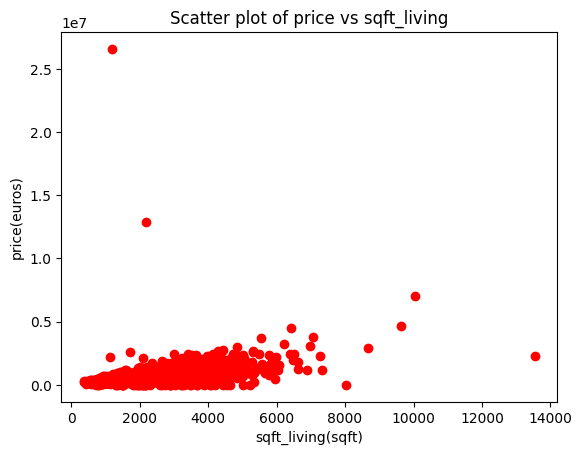

In [ ]:
plt.scatter(house_data["sqft_living"], house_data["price"], c="red")
plt.title("Scatter plot of price vs sqft_living")
plt.xlabel("sqft_living(sqft)")
plt.ylabel("price(euros)")
plt.show()

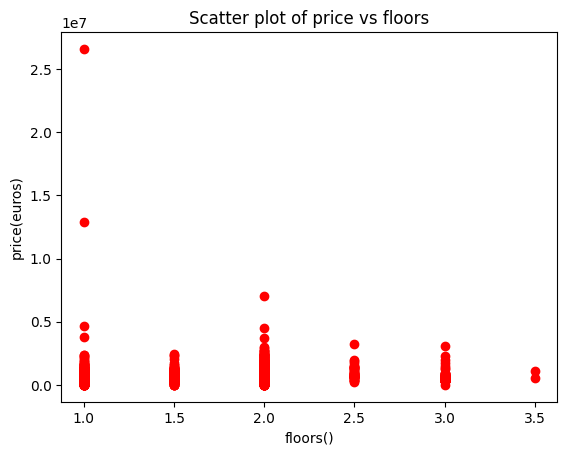

In [ ]:
plt.scatter(house_data["floors"], house_data["price"], c="red")
plt.title("Scatter plot of price vs floors")
plt.xlabel("floors()")
plt.ylabel("price(euros)")
plt.show()plt.hist(house_data["sqft_living"])

(array([1.665e+03, 2.216e+03, 5.850e+02, 1.040e+02, 2.100e+01, 5.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([  370.,  1687.,  3004.,  4321.,  5638.,  6955.,  8272.,  9589.,
        10906., 12223., 13540.]),
 <BarContainer object of 10 artists>)

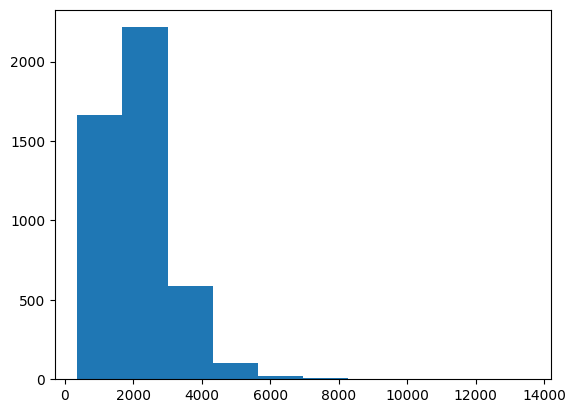

In [ ]:
plt.hist(house_data["sqft_living"])

(array([2402.,  357.,  415.,  518.,  428.,  184.,  146.,   66.,   72.,
          12.]),
 array([ 0. ,  4.3,  8.6, 12.9, 17.2, 21.5, 25.8, 30.1, 34.4, 38.7, 43. ]),
 <BarContainer object of 10 artists>)

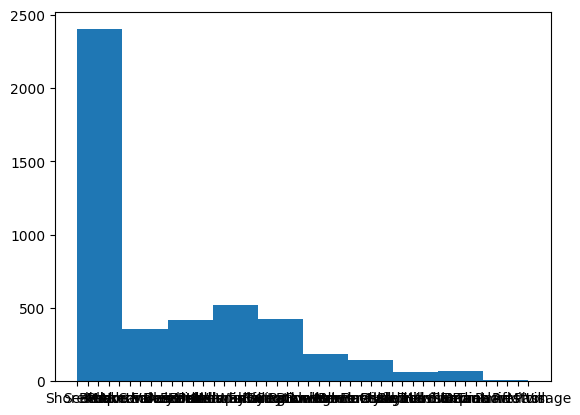

In [ ]:
plt.hist(house_data["city"])

(array([2.174e+03, 0.000e+00, 4.440e+02, 0.000e+00, 1.811e+03, 0.000e+00,
        4.100e+01, 0.000e+00, 1.280e+02, 2.000e+00]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ]),
 <BarContainer object of 10 artists>)

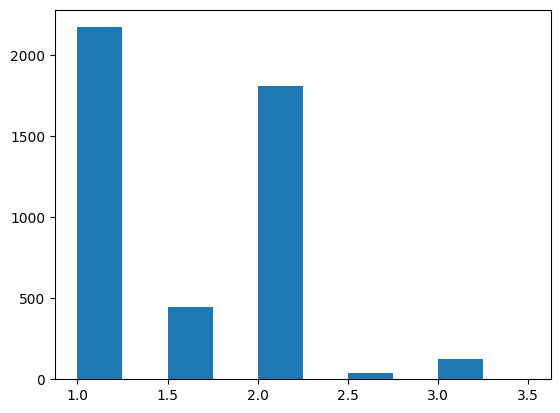

In [ ]:
plt.hist(house_data["floors"])

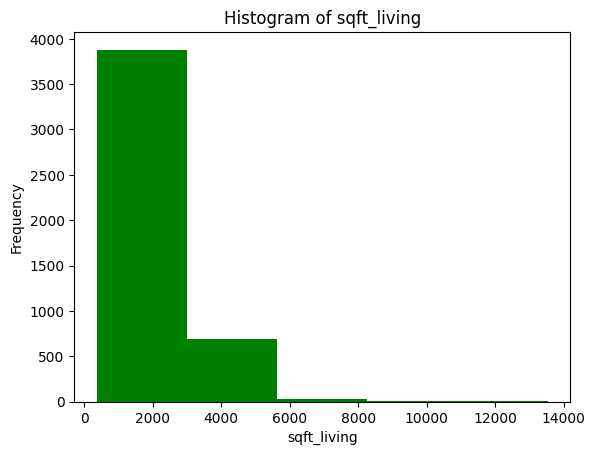

In [ ]:
plt.hist(house_data["sqft_living"],
        color = "green",
        bins = 5)
plt.title("Histogram of sqft_living")
plt.xlabel("sqft_living")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import seaborn as sn

<Axes: xlabel='floors', ylabel='price'>

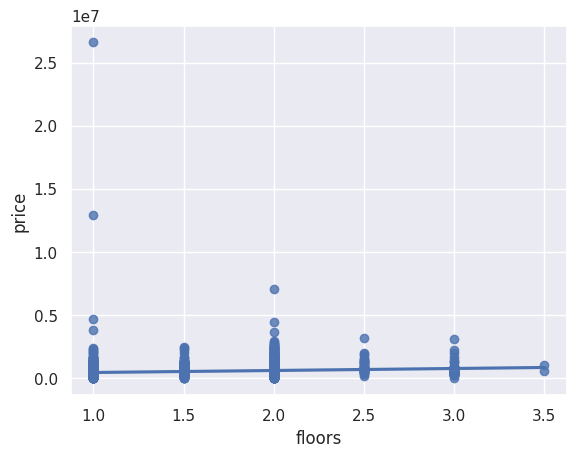

In [ ]:
sns.set(style = "darkgrid")
sns.regplot(x = house_data["floors"], y = house_data["price"])

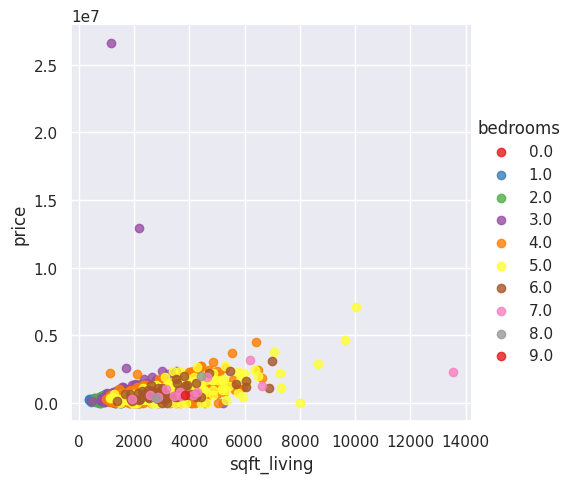

In [ ]:
sns.lmplot(x = "sqft_living", y="price", data=house_data,
           fit_reg= False,hue="bedrooms",
           legend = True, palette ="Set1")

<ipython-input-54-847a03cae21f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data["floors"], kde = True, bins = 5)


<Axes: xlabel='floors', ylabel='Density'>

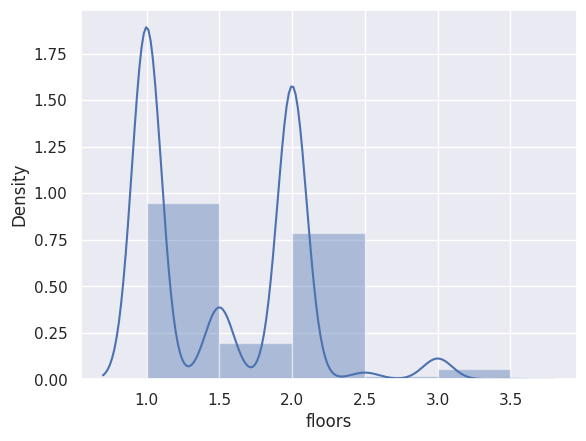

In [ ]:
sns.distplot(house_data["floors"], kde = True, bins = 5)

<Axes: xlabel='bedrooms', ylabel='count'>

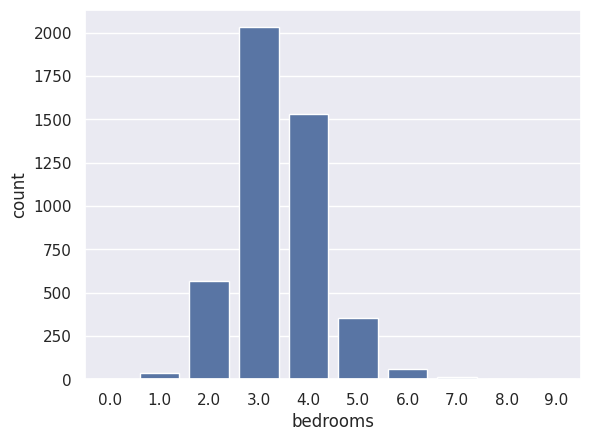

In [ ]:
sns.countplot(x="bedrooms", data=house_data)

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64


<ipython-input-56-82b209ffceb3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data['price'], color='purple'  );


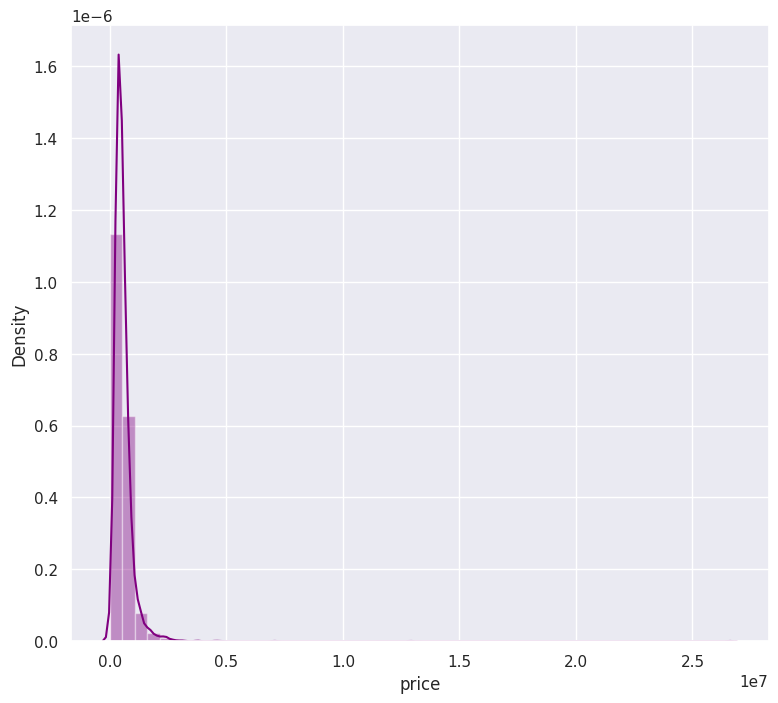

In [ ]:
print(house_data['price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(house_data['price'], color='purple'  );

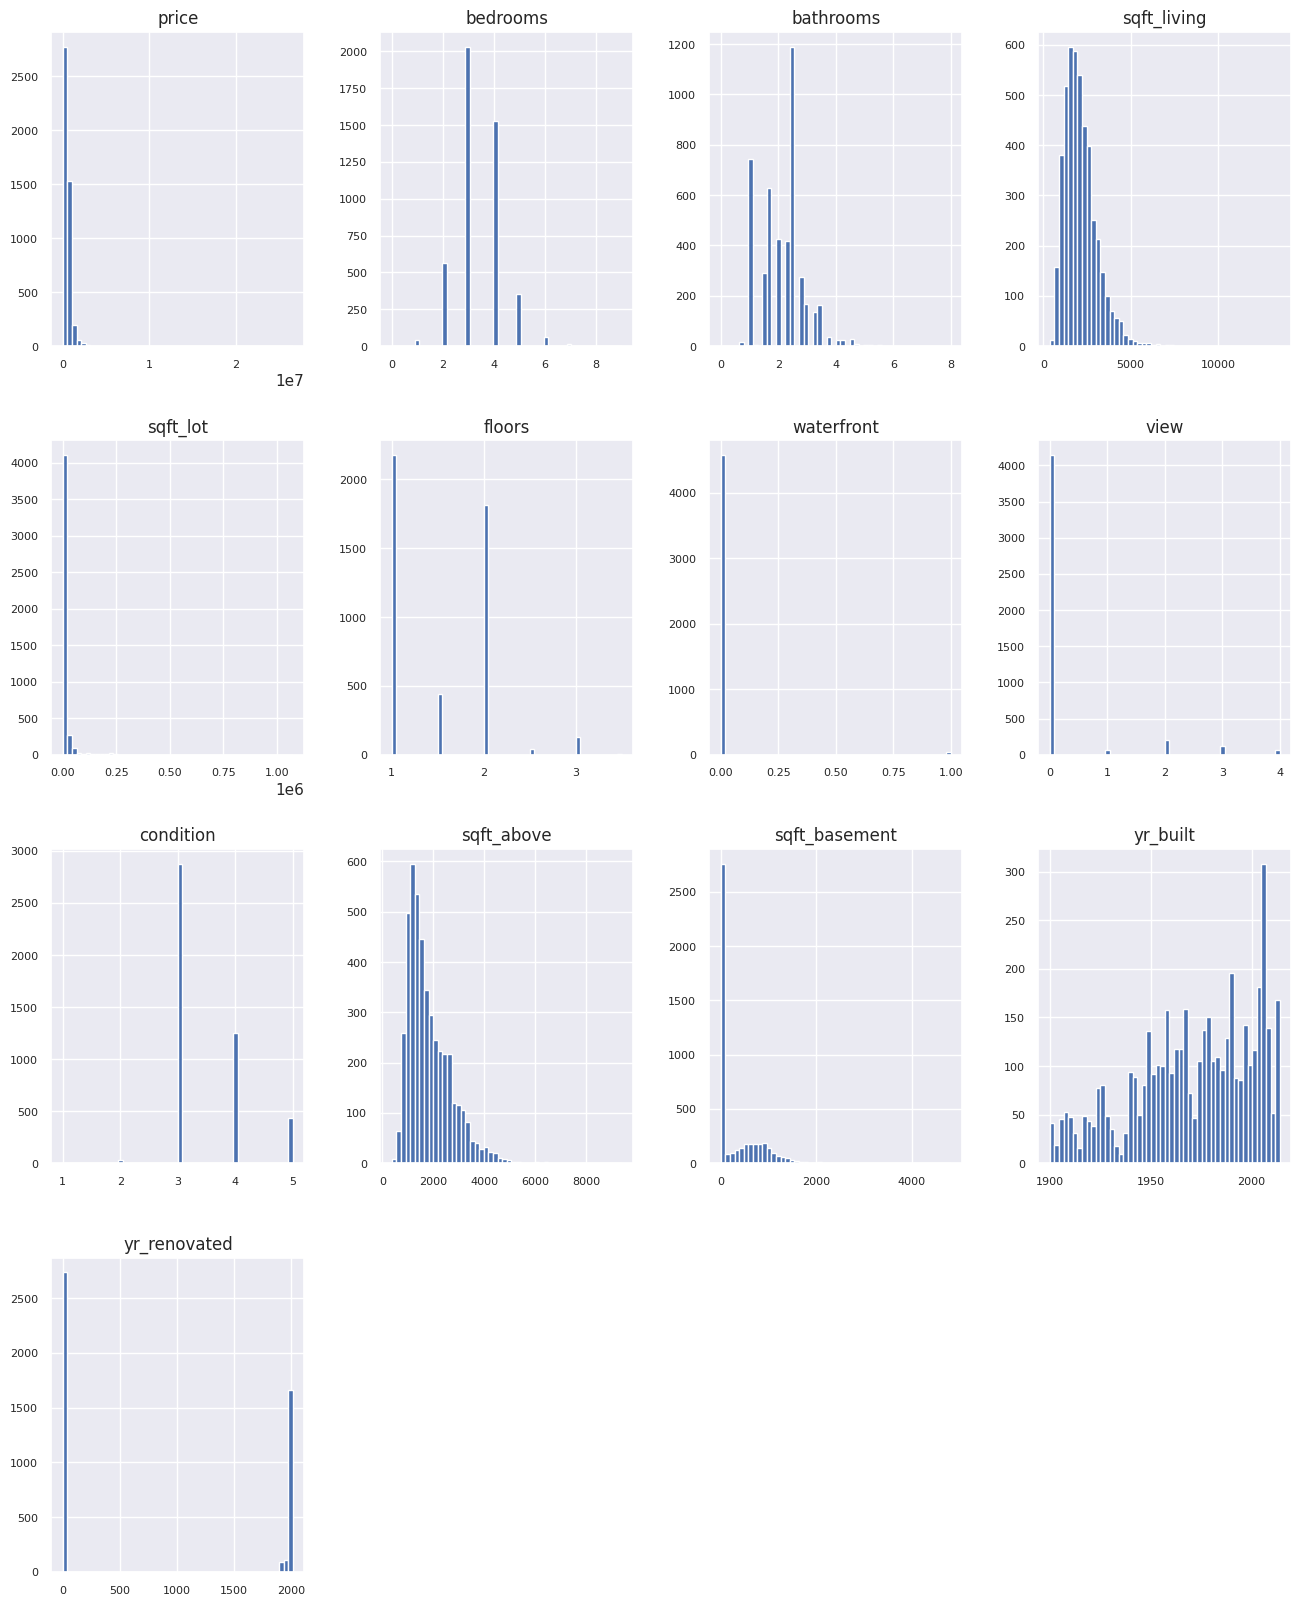

In [ ]:
house_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
X = house_data[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated','street','city','statezip','country']]
y = house_data['price']

In [ ]:
print(X_train.shape, y_train.shape)

(3680, 4655) (3680,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
X = house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']]
y = house_data['price']
X_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

In [ ]:
X_train_encoded = X_train_encoded.select_dtypes(include=[np.number])

In [ ]:
X_train_encoded = X_train_encoded.dropna()

In [ ]:
model = LinearRegression()
model.fit(X_train_encoded, y_train)

LinearRegression()

In [ ]:
X_test_encoded = pd.get_dummies(X_test)

In [ ]:
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [ ]:
X_test_encoded = X_test_encoded.dropna()

In [ ]:
y_pred = model.predict(X_test_encoded)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4584243326632.248


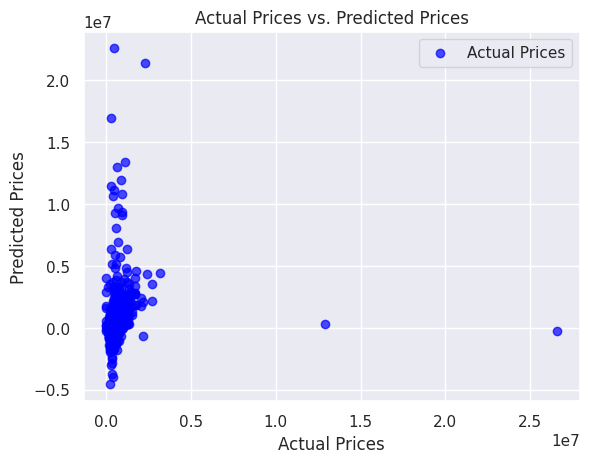

In [ ]:
plt.scatter(y_test, y_pred, c='blue', label='Actual Prices', alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.legend()
plt.show()

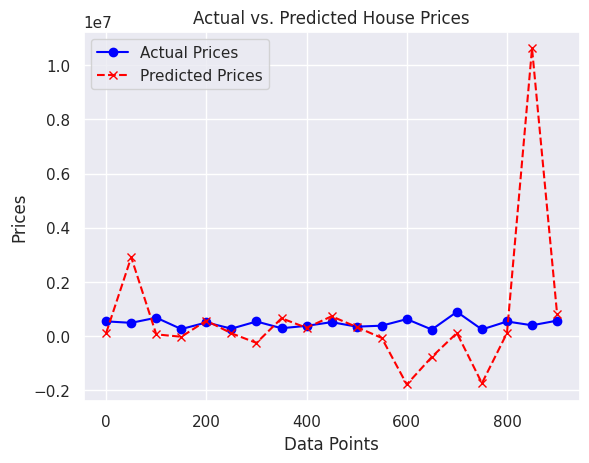

In [ ]:
indices = range(0, len(y_test), 50)
plt.plot(indices, y_test[::50], label='Actual Prices', marker='o', linestyle='-', color='blue')
plt.plot(indices, y_pred[::50], label='Predicted Prices', marker='x', linestyle='--', color='red')
plt.xlabel('Data Points')
plt.ylabel('Prices')
plt.title('Actual vs. Predicted House Prices')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
data = pd.read_csv('output.csv')
print(data)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0       

In [ ]:
data['price_per_sqft']=data['price']*10000/data['sqft_living']

In [ ]:
data['price_per_sqft']

0       2.335821e+06
1       6.531507e+06
2       1.772021e+06
3       2.100000e+06
4       2.835052e+06
            ...     
4595    2.040839e+06
4596    3.659817e+06
4597    1.385064e+06
4598    9.732057e+05
4599    1.480537e+06
Name: price_per_sqft, Length: 4600, dtype: float64

In [ ]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price_per_sqft
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03
mean,5.519630e+05,3.400870,2.160815,2139.103478,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,2.659110e+06
std,5.638347e+05,0.908848,0.783781,963.159990,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,3.575221e+06
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000e+00
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,1.808190e+06
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,2.437888e+06
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,3.148436e+06
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,2.253390e+08


In [ ]:
print(y_pred[:10])

[ 1.17576187e+05 -2.68833212e+05  3.35716654e+06  2.61648287e+03
 -5.30939896e+05  1.31530634e+06 -2.31621655e+05  2.28253144e+05
  7.35265718e+05  8.74590612e+05]


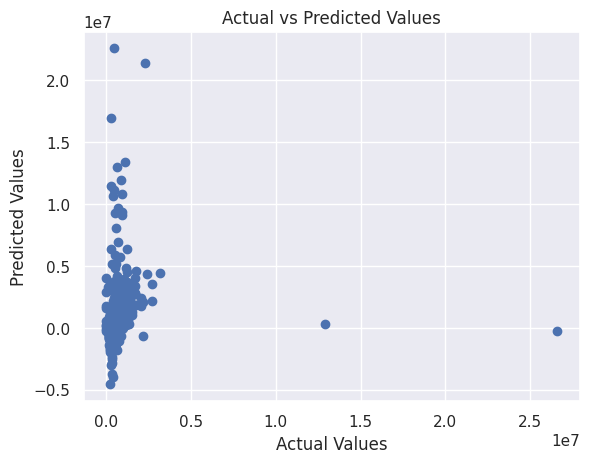

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

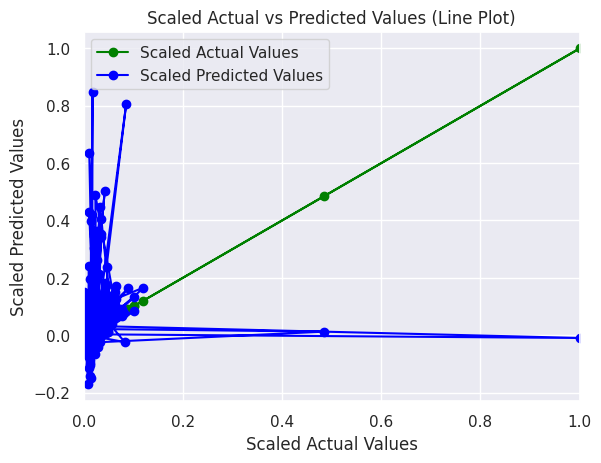

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
y_test = np.array(y_test).reshape(-1, 1)
y_pred = np.array(y_pred).reshape(-1, 1)
scaler = MinMaxScaler()
scaled_y_test = scaler.fit_transform(y_test)
scaled_y_pred = scaler.transform(y_pred)
plt.plot(scaled_y_test, scaled_y_test, marker='o', linestyle='-', color='green', label='Scaled Actual Values')
plt.plot(scaled_y_test, scaled_y_pred, marker='o', linestyle='-', color='blue', label='Scaled Predicted Values')
plt.xlabel('Scaled Actual Values')
plt.ylabel('Scaled Predicted Values')
plt.title('Scaled Actual vs Predicted Values (Line Plot)')
plt.legend()
plt.xlim(0, 1)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
X = house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]
y = house_data['price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 986910554328.4626


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
X = house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]
y = house_data['price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 986949197113.0435


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.169e+14, tolerance: 5.229e+10
  model = cd_fast.enet_coordinate_descent(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pickle
X = house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]
y = house_data['price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
with open('house_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

Mean Squared Error: 986918350899.6332


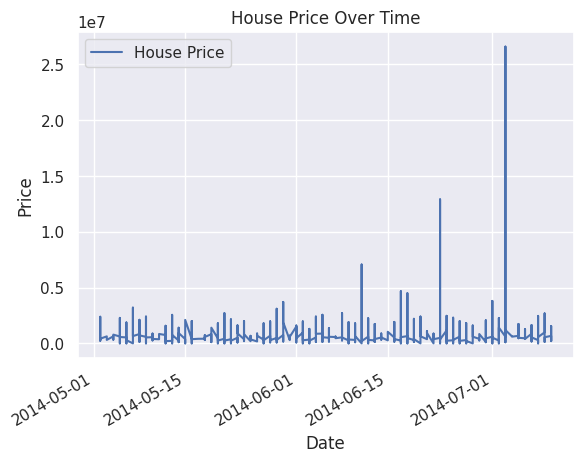

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
house_data.index = pd.to_datetime(house_data.index)
house_data.plot.line(y="price", use_index=True, label="House Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("House Price Over Time")
plt.legend()
plt.show()

In [ ]:
house_data.index = pd.to_datetime(house_data.index)
house_data['year'] = house_data.index.year
yearly_ratios = house_data.groupby('year')['price'].mean()
print(yearly_ratios)

year
2014    551962.988473
Name: price, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from ipywidgets import interact, widgets
from IPython.display import display
house_data.index = pd.to_datetime(house_data.index)
house_data.reset_index(drop=True, inplace=True)
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']
categorical_features = ['street', 'city', 'country']
target_variable = 'price'
X_numerical = house_data[numerical_features]
X_categorical = house_data[categorical_features]
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_categorical_encoded = pd.DataFrame(encoder.fit_transform(X_categorical), columns=encoder.get_feature_names_out(X_categorical.columns))
X = pd.concat([X_numerical, X_categorical_encoded], axis=1)
y = house_data[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
def predict_house_price(num_bedrooms, num_bathrooms, sqft_living, floors, street, city, country):
    input_data = pd.DataFrame([[num_bedrooms, num_bathrooms, sqft_living, floors, street, city, country]],
                              columns=['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'street', 'city', 'country'])
    input_data_encoded = pd.DataFrame(encoder.transform(input_data[['street', 'city', 'country']]),
                                      columns=encoder.get_feature_names_out(['street', 'city', 'country']))
    input_data_combined = pd.concat([input_data[['bedrooms', 'bathrooms', 'sqft_living', 'floors']], input_data_encoded], axis=1)
    predicted_price = model.predict(input_data_combined)
    return f'Predicted House Price: ${predicted_price[0]:,.2f}'
@interact(num_bedrooms=num_bedrooms_widget, num_bathrooms=num_bathrooms_widget,
          sqft_living=sqft_living_widget, floors=floors_widget,
          street=street_widget, city=city_widget, country=country_widget)
def predict_price_interactive(num_bedrooms, num_bathrooms, sqft_living, floors, street, city, country):
    prediction_result = predict_house_price(num_bedrooms, num_bathrooms, sqft_living, floors, street, city, country)
    print(prediction_result)